## Create Test Data
* [F=MA test case](#fma)
* [Quadratic Data Test Case](#quadratic)
* [F=MA Extrapolation Test Case](#fma_extrap)
* [I.29.4](#I_29_4)
* [III.19.51](#III_19_51)
* [III.9.52](#III_9_52)
* [Create Test Data from File](#data_from_file)
* [Create Test Data from Expression](#data_from_expr)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import parse_expr, symbols, lambdify, cos, srepr, pi, sqrt

### F=MA test case <a class="anchor" id="fma"></a>
Create the F=MA test dataset.

In [7]:
fma_data = np.zeros((1000,6))
fma_data[:,:5] = np.random.rand(1000,5)
noise = np.random.normal(0, 0.0001, 1000)
fma_data[:,5] = fma_data[:,0] * fma_data[:,3] + noise
np.savetxt(r'fma.txt', fma_data, fmt="%.6g")
fma_df = pd.DataFrame(fma_data, columns=["Mass","Misc1","Misc2","Acceleration","Misc3", "Force with Noise"])

print(fma_df.head())

       Mass     Misc1     Misc2  Acceleration     Misc3  Force with Noise
0  0.766358  0.106491  0.942292      0.435896  0.575025          0.333998
1  0.409691  0.316899  0.220034      0.053888  0.713816          0.021991
2  0.134737  0.112782  0.785934      0.560379  0.100987          0.075515
3  0.722676  0.164930  0.354243      0.124502  0.489681          0.089859
4  0.153307  0.001578  0.664105      0.736364  0.367637          0.112831


In [8]:
print(fma_data[:10,:])

[[0.76635765 0.10649141 0.9422916  0.43589611 0.57502486 0.33399805]
 [0.40969124 0.31689905 0.22003413 0.05388765 0.71381579 0.0219911 ]
 [0.13473667 0.11278202 0.78593446 0.56037941 0.10098722 0.07551529]
 [0.72267648 0.16493036 0.35424341 0.1245025  0.48968138 0.08985852]
 [0.15330666 0.00157842 0.66410549 0.7363642  0.36763725 0.11283114]
 [0.05831261 0.55745674 0.9535622  0.9264562  0.25261205 0.05398853]
 [0.09223064 0.24127125 0.29522    0.83502091 0.0440923  0.07702419]
 [0.46613817 0.66587297 0.13385599 0.96182231 0.0741055  0.44829275]
 [0.61784391 0.31392212 0.03068304 0.57888775 0.99128297 0.35771711]
 [0.39472792 0.99721626 0.59676101 0.58241399 0.54927714 0.22989429]]


### Quadratic Data Test Case <a class="anchor" id="quadratic"></a>
Create the quadratic data which loosely uses the quadratic formula to compute the target x. Includes some miscellaneous variables to test the feature selection aspect of the algorithm.

In [54]:
quadratic_data = np.zeros((1000,10))
quadratic_data[:,:9] = np.abs(np.random.rand(1000,9))
noise = np.random.normal(0, 0.1, 1000)
quadratic_data[:,9] = (-quadratic_data[:,7] + (quadratic_data[:,7]**2 - 4* quadratic_data[:,3]*quadratic_data[:,8]))/(2*quadratic_data[:,3]) + noise
np.savetxt(r'quadratic.txt', quadratic_data, fmt="%.6g")
quadratic_df = pd.DataFrame(quadratic_data, columns=["Misc1","Misc2","Misc3","a","Misc4","Misc5","Misc6","b","c","x with Noise"])
print(quadratic_df.head())

      Misc1     Misc2     Misc3         a     Misc4     Misc5     Misc6   
0  0.675272  0.432943  0.046983  0.861214  0.702598  0.417184  0.560068  \
1  0.984780  0.777475  0.712357  0.838936  0.971165  0.986190  0.008301   
2  0.923459  0.504714  0.107544  0.517850  0.802131  0.050005  0.778398   
3  0.986630  0.143443  0.807458  0.234926  0.640062  0.872019  0.909379   
4  0.504544  0.788432  0.145685  0.698096  0.217389  0.107916  0.390136   

          b         c  x with Noise  
0  0.016365  0.111761     -0.156931  
1  0.777141  0.647112     -1.366564  
2  0.802817  0.575846     -1.283615  
3  0.785147  0.175999     -0.892778  
4  0.392631  0.646910     -1.310025  


### F=MA Extrapolation Test Case <a class="anchor" id="fma_extrap"></a>
Create the extrapolation data for the F=MA test case.

In [5]:
num_baseline = 800
num_5_percent = 200
num_10_percent = 200
num_15_percent = 200
total_data = num_5_percent+num_15_percent+num_10_percent+num_baseline
num_columns = 5
extrap_data = np.zeros((total_data,num_columns))

for i in range(num_columns):
    last_index=num_baseline
    extrap_data[:last_index,i] = np.random.normal(1,0.02,num_baseline) # baseline data
    last_index += num_5_percent
    extrap_data[num_baseline:last_index,i] = np.random.normal(1.05,0.02,num_5_percent) # 5% extrapolation data
    last_index += num_10_percent
    extrap_data[last_index-num_10_percent:last_index,i] = np.random.normal(1.1,0.02,num_10_percent) # 10% extrapolation data
    extrap_data[last_index:last_index+num_15_percent,i] = np.random.normal(1.15,0.02,num_15_percent) # 15% extrapolation data

noise = np.random.normal(0, 0.01, total_data)
fma_extrap_data = np.zeros((total_data,6))
fma_extrap_data[:,:5] = extrap_data
fma_extrap_data[:,5] = extrap_data[:,0] * extrap_data[:,3] + noise
np.savetxt(r'fma_extrap.txt', fma_extrap_data, fmt="%.6g")
fma_extrap_df = pd.DataFrame(fma_extrap_data, columns=["Mass","Misc1","Misc2","Acceleration","Misc3", "Force with Noise"])

print(fma_extrap_df.head())

       Mass     Misc1     Misc2  Acceleration     Misc3  Force with Noise
0  1.009013  1.014493  0.998634      0.999480  1.008791          1.011370
1  0.958151  0.974660  0.980792      0.939451  1.017947          0.915651
2  1.005866  0.985327  0.975458      1.041891  1.008207          1.028123
3  0.993997  0.995029  1.002033      0.959032  0.981955          0.947560
4  1.000057  1.000252  0.996116      0.977309  0.985384          0.969333


### Feynman Equation I.29.4 <a class="anchor" id="I_29_4"></a>

In [6]:
feynman1 = pd.read_csv("~/Downloads/Feynman_with_units/I.29.4",header=None,sep=" ")
del feynman1[3]
feynman1.head()

,0,1,2
0,3.696694,8.365269,0.441910
1,7.821465,1.504280,5.199475
2,9.644371,2.644844,3.646480
3,6.121862,5.799291,1.055623
4,2.479241,5.720310,0.433410


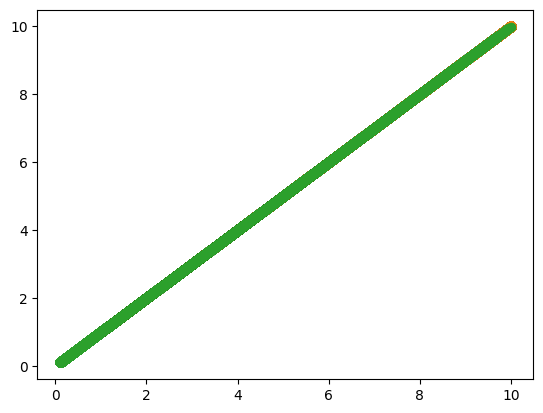

In [16]:
plt.scatter(feynman1[0],feynman1[0])

plt.scatter(feynman1[1],feynman1[1])
plt.scatter(feynman1[2],feynman1[2])

In [15]:
print(feynman1[0].shape)
feynman1[feynman1[0] <5][0].shape

(1000000,)


(443795,)

In [41]:
f1_train = ((feynman1[feynman1[0] <5])[feynman1[1] <5])[feynman1[2] <5].to_numpy()[:250,:]
f1_1_extrap_1 = ((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5].to_numpy()[:20,:]
f1_1_extrap_2 = ((feynman1[feynman1[0] <5])[feynman1[1] >7])[feynman1[1] <7.5].to_numpy()[:20,:]
f1_2_extrap_1 = ((feynman1[feynman1[1] <5])[feynman1[0] >6])[feynman1[0] <6.5].to_numpy()[:20,:]
f1_2_extrap_2 = ((feynman1[feynman1[1] <5])[feynman1[0] >7])[feynman1[0] <7.5].to_numpy()[:20,:]
np.savetxt(r'f1_train.txt', f1_train, fmt="%.6g")
np.savetxt(r'f1_1_extrap_1.txt', f1_1_extrap_1, fmt="%.6g")
np.savetxt(r'f1_1_extrap_2.txt', f1_1_extrap_2, fmt="%.6g")
np.savetxt(r'f1_2_extrap_1.txt', f1_2_extrap_1, fmt="%.6g")
np.savetxt(r'f1_2_extrap_2.txt', f1_2_extrap_2, fmt="%.6g")

/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/1093452898.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f1_train = ((feynman1[feynman1[0] <5])[feynman1[1] <5])[feynman1[2] <5].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/1093452898.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f1_train = ((feynman1[feynman1[0] <5])[feynman1[1] <5])[feynman1[2] <5].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/1093452898.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f1_1_extrap_1 = ((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5].to_numpy()[:20,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/1093452898.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f1_1_extrap_1 = ((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5].to_num

In [40]:
((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5]

            0         1         2
38   1.215817  6.342872  0.191682
76   3.596648  6.019268  0.597523
95   4.817433  6.248988  0.770914
104  4.666751  6.468595  0.721447
173  1.278293  6.419545  0.199125


/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/350401211.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5].head())
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_1255/350401211.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(((feynman1[feynman1[0] <5])[feynman1[1] >6])[feynman1[1] <6.5].head())


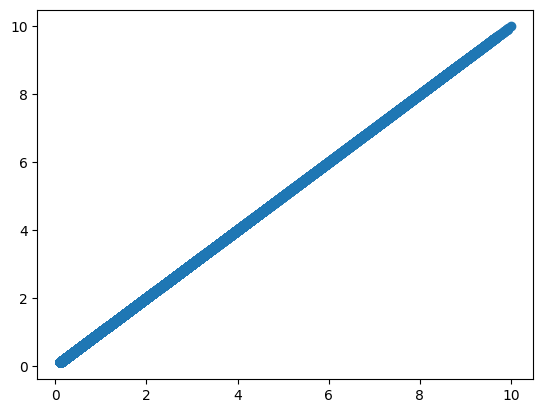

In [22]:
plt.scatter(feynman1[2],feynman1[2])

### Feynman Equation III.19.51 <a class="anchor" id="III_19_51"></a>


In [4]:
feynman2 = pd.read_csv("~/Downloads/Feynman_with_units/III.19.51",header=None,sep=" ")
del feynman2[6]
feynman2.head()

,0,1,2,3,4,5
0,3.097960,1.303731,4.303607,2.871660,3.743025,-0.000523
1,1.476039,4.041136,2.382800,3.883152,4.416923,-0.029460
2,3.393253,4.761085,3.977059,4.884616,1.477438,-0.264574
3,1.735850,2.303089,1.318085,1.803646,4.448613,-0.054579
4,2.862424,4.400920,2.150326,4.387321,3.407497,-0.129879


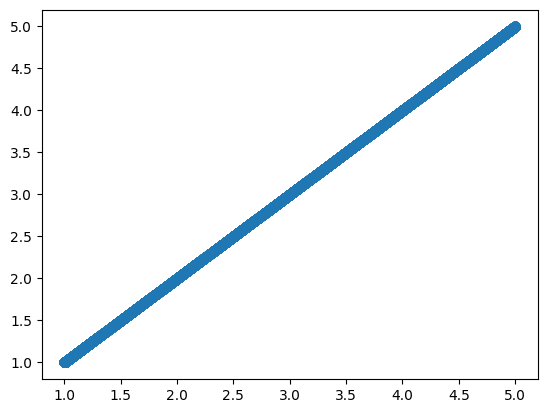

In [8]:
plt.scatter(feynman2[3],feynman2[3])

In [9]:
# For the training set we take all values less than 3 as value range is 0 - 5
f2_train = ((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[2] <3])[feynman2[3] <3])[feynman2[4] <3].to_numpy()[:250,:]
f2_4_extrap = (((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[2] <3])[feynman2[3] <3])[feynman2[4] >4])[feynman2[4] <4.5].to_numpy()[:20,:]
f2_2_extrap = (((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[4] <3])[feynman2[3] <3])[feynman2[2] >4])[feynman2[2] <4.5].to_numpy()[:20,:]
np.savetxt(r'f2_train.txt', f2_train, fmt="%.6g")
np.savetxt(r'f2_4_extrap.txt', f2_4_extrap, fmt="%.6g")
np.savetxt(r'f2_2_extrap.txt', f2_2_extrap, fmt="%.6g")

/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/2112710977.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f2_train = ((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[2] <3])[feynman2[3] <3])[feynman2[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/2112710977.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f2_train = ((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[2] <3])[feynman2[3] <3])[feynman2[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/2112710977.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f2_train = ((((feynman2[feynman2[0] <3])[feynman2[1] <3])[feynman2[2] <3])[feynman2[3] <3])[feynman2[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/2112710977.py:2: UserWarning: Boolean Series key will be reindexed to match Da

### Feynman Equation III.9.52 <a class="anchor" id="III_9_52"></a>


In [11]:
feynman3 = pd.read_csv("~/Downloads/Feynman_with_units/III.9.52",header=None,sep=" ")
del feynman3[6]
feynman3.head()

,0,1,2,3,4,5
0,3.097960,1.303731,4.303607,2.871660,3.743025,-0.000523
1,1.476039,4.041136,2.382800,3.883152,4.416923,-0.029460
2,3.393253,4.761085,3.977059,4.884616,1.477438,-0.264574
3,1.735850,2.303089,1.318085,1.803646,4.448613,-0.054579
4,2.862424,4.400920,2.150326,4.387321,3.407497,-0.129879


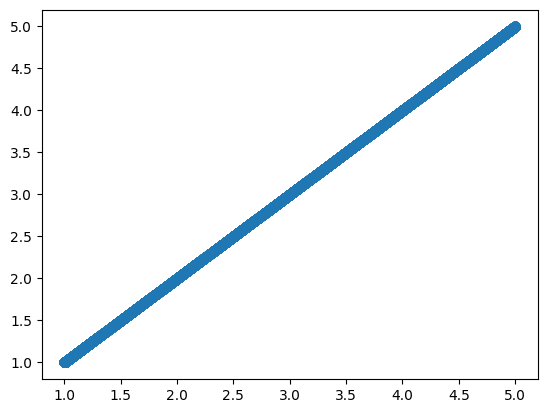

In [13]:
plt.scatter(feynman3[3],feynman3[3])

In [14]:
# For the training set we take all values less than 3 as value range is 0 - 5
f3_train = ((((feynman3[feynman3[0] <3])[feynman3[1] <3])[feynman3[2] <3])[feynman3[3] <3])[feynman3[4] <3].to_numpy()[:250,:]
f3_4_extrap = (((((feynman3[feynman3[0] <3])[feynman3[1] <3])[feynman3[2] <3])[feynman3[3] <3])[feynman3[4] >4])[feynman3[4] <4.5].to_numpy()[:20,:]
f3_2_extrap = (((((feynman3[feynman2[0] <3])[feynman3[1] <3])[feynman3[4] <3])[feynman3[3] <3])[feynman3[2] >4])[feynman3[2] <4.5].to_numpy()[:20,:]
np.savetxt(r'f3_train.txt', f3_train, fmt="%.6g")
np.savetxt(r'f3_4_extrap.txt', f3_4_extrap, fmt="%.6g")
np.savetxt(r'f3_2_extrap.txt', f3_2_extrap, fmt="%.6g")

/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/3768213749.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f3_train = ((((feynman3[feynman3[0] <3])[feynman3[1] <3])[feynman3[2] <3])[feynman3[3] <3])[feynman3[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/3768213749.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f3_train = ((((feynman3[feynman3[0] <3])[feynman3[1] <3])[feynman3[2] <3])[feynman3[3] <3])[feynman3[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/3768213749.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f3_train = ((((feynman3[feynman3[0] <3])[feynman3[1] <3])[feynman3[2] <3])[feynman3[3] <3])[feynman3[4] <3].to_numpy()[:250,:]
/var/folders/2x/r7stqt9j3ys7q29zxm50kcv40000gn/T/ipykernel_2342/3768213749.py:2: UserWarning: Boolean Series key will be reindexed to match Da

In [2]:
feynman3 = pd.read_csv("I_13_12.txt",header=None,sep=" ")
del feynman3[6]
print(feynman3.head())

          0         1         2         3         4         5
0  1.983441  2.487402  1.492983  1.517254  1.851430 -0.097871
1  1.308403  3.180409  3.608846  4.437935  2.939737 -0.633263
2  1.368444  2.518865  3.217948  4.206875  2.306524 -0.580785
3  1.075827  4.965883  2.084955  2.136287  2.032850 -0.125163
4  2.707033  3.776064  1.583844  1.369681  1.017010  1.026291


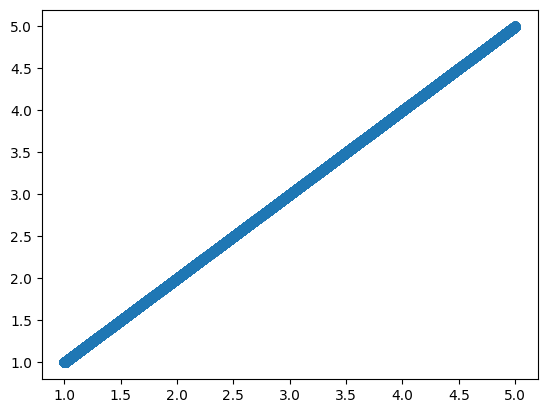

In [13]:
plt.scatter(feynman3[2],feynman3[2])

### Create a Dataset from a File <a class="anchor" id="data_from_file"></a>


In [2]:
def create_dataset_from_file(dataset_path, train_bound, extrap_range, extrap_all=True, drop_last_col=False):
    """
    Function creates a dataset from a file containing a space separated dataset
    :param dataset_path: Path to the dataset (stored in a space separated file)
    :param train_bound: list like structure containing the minimum and maximum values for each variable
    :param extrap_range: list like structure containg the minimum and maximum values for each variable for extrapolation set
    :param extrap_all: Boolean to indicate if extrapolation is to be done for all variables
    :param drop_last_col: Boolean to indicate if the last column should be dropped
    :return: training dataset and extrapolation dataset (numpy arrays)
    """
    dataset = pd.read_csv(dataset_path,header=None,sep=" ")
    num_vars = dataset.shape[1]
    if drop_last_col:
       del dataset[num_vars-1]
    train_set = dataset
    for i in range(num_vars-1):
       train_set = train_set[train_set[i] < train_bound]
    extrap_set = dataset
    if extrap_all:
       for i in range(num_vars-1):
           extrap_set = extrap_set[extrap_set[i] < extrap_range[1]]
           extrap_set = extrap_set[extrap_set[i] > extrap_range[0]]

    return train_set, extrap_set


In [13]:
create_dataset_from_file("I_13_12.txt", 1, (3.5,4), drop_last_col=True)[1]

,0,1,2,3,4,5
69,4.917536,4.844909,4.712049,3.934038,4.826874,4.826546
629,4.142854,4.896062,4.542200,3.509646,3.553704,4.668863
2163,4.703673,3.587178,4.839376,3.672361,4.443606,4.923425
4998,3.801667,4.827381,4.992257,4.082153,4.435977,3.635631
5500,4.260487,4.052621,4.692202,3.907864,4.868614,3.595737
...,...,...,...,...,...,...
995426,4.386301,4.476548,4.823317,3.835714,4.069012,4.265017
995669,3.794372,3.771333,4.692585,3.511842,3.841958,3.939086
997039,3.919361,3.895573,4.523447,3.532901,4.630070,4.381750
998176,4.479618,4.739263,4.569413,3.854275,4.362707,3.760923


### Create a Dataset from a sympy expression <a class="anchor" id="data_from_expr"></a>

In [3]:
def create_dataset_from_expr(expr,expr_vars, num_data_points = [250,6], train_range = (0,3), extrap_range = (3.5,4), extrap_cols = [], random_seed=0):
    '''
    :param expr: A sympy expression which will be used to calculate the value of the last column
    :param expr_vars: A list of the names of variables whose value will be in the resultant dataset
    :param num_data_points: the number of datapoints for each variable in the resultant dataset
    :param train_range: list like structure containing the minimum and maximum values for each variable
    :param extrap_range: list like structure containing the minimum and maximum values for each extrapolation variable
    :param extrap_cols: columns which will contain values in the extrapolation range
    :return: numpy matrix whose last column contains values in form specified by expr
    '''
    np.random.seed(random_seed)
    t_range = train_range[1] - train_range[0]
    e_range = extrap_range[1] - extrap_range[0]
    dataset = np.random.rand(num_data_points, len(expr_vars)+1) * t_range + train_range[0]
    if len(extrap_cols) > 0:
        dataset[:, extrap_cols] = np.random.rand(num_data_points, len(extrap_cols)) * e_range + extrap_range[0]
    lamda_expr = np.vectorize(lambdify(expr_vars, expr, modules=["scipy", "numpy"]))
    dataset[:,-1] = lamda_expr(*(dataset[:,:-1].T.tolist()))
    return dataset

In [5]:
#I_13_12_train = create_dataset_from_expr(parse_expr("G*m1*m2*(1/r1-1/r2)"), symbols("G m1 m2 r1 r2"), num_data_points=250, train_range=(0,3),random_seed=0)
# I_13_12_train = create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=250, train_range=(0,3),random_seed=0)
# print(pd.DataFrame(I_13_12_train).head())
# np.savetxt(r'Test Data/I_13_12/I_13_12_train_without_G.txt', I_13_12_train, fmt="%.6g")

          0         1         2         3          4
0  1.646441  2.145568  1.808290  1.634650  -1.384963
1  1.937682  1.312762  2.675319  2.890988   0.473398
2  2.375175  1.586685  1.704134  2.776790   5.701532
3  0.261388  0.060655  2.497860  2.334470  -0.002965
4  2.935855  2.397476  1.384438  2.341588  13.869987


In [6]:
#I_13_12_extrap = create_dataset_from_expr(parse_expr("G*m1*m2*(1/r1-1/r2)"), symbols("G m1 m2 r1 r2"), num_data_points=250, train_range=(0, 3), extrap_range=(3.5, 4.0), extrap_cols=[0,1,2,3,4], random_seed=1)
# I_13_12_extrap = create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=250, train_range=(0, 3), extrap_range=(3.5, 4.0), extrap_cols=[0,1,2,3,4], random_seed=1)
# print(pd.DataFrame(I_13_12_extrap).head())
# np.savetxt(r'Test Data/I_13_12/I_13_12_extrap_without_G.txt', I_13_12_extrap, fmt="%.6g")

          0         1         2         3         4
0  3.637802  3.962370  3.693495  3.746440  0.368096
1  3.942483  3.691632  3.648787  3.858797  1.448836
2  3.559096  3.918499  3.872068  3.795260 -0.486487
3  3.811624  3.819178  3.663785  3.533745 -0.975851
4  3.729978  3.881936  3.626944  3.795694  1.184557


In [4]:
# I_data = pd.read_csv("Test Data/I_13_12/I_13_12_train_without_G.txt",header=None,sep=" ")
#
# I_data['G'] = np.zeros(I_data.shape[0])+6.67408
# np.savetxt(r'Test Data/I_13_12/I_13_12_train.txt', I_data, fmt="%.6g")
### -------------- I_13_12 train set between 0 and 1 ------------------- ###
I_13_12_train = pd.DataFrame(create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=100, train_range=(0,1),random_seed=0))
I_13_12_train['G'] = np.zeros(I_13_12_train.shape[0])+6.67408
cols = list(I_13_12_train.columns)
cols.insert(0,cols.pop(5))
I_13_12_train = I_13_12_train[cols]
I_13_12_train = I_13_12_train.to_numpy()
# max_t = np.max(I_13_12_train[:,-1])
# min_t = np.min(I_13_12_train[:,-1])
# I_13_12_train[:,-1] = (I_13_12_train[:,-1]-min_t)/(max_t-min_t)
mean = np.mean(I_13_12_train[:,-1])
std = np.std(I_13_12_train[:,-1])
I_13_12_train[:,-1] = (I_13_12_train[:,-1]-mean)/std
print(pd.DataFrame(I_13_12_train).head())
np.savetxt(r'Test_Data_Final/I_13_12/I_13_12_train.txt', I_13_12_train, fmt="%.6g")
### -------------- I_13_12 test set between 0 and 1 ------------------- ###
I_13_12_train = pd.DataFrame(create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=50, train_range=(0,1),random_seed=1))
I_13_12_train['G'] = np.zeros(I_13_12_train.shape[0])+6.67408
cols = list(I_13_12_train.columns)
cols.insert(0,cols.pop(5))
I_13_12_train = I_13_12_train[cols]
I_13_12_train = I_13_12_train.to_numpy()
#I_13_12_train[:,-1] = (I_13_12_train[:,-1]-min_t)/(max_t-min_t)
I_13_12_train[:,-1] = (I_13_12_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_13_12/I_13_12_test.txt', I_13_12_train, fmt="%.6g")
### -------------- I_13_12 extrapolation set 1 between 1 and 2 ------------------- ###
I_13_12_train = pd.DataFrame(create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=50, train_range=(1,2),random_seed=2))
I_13_12_train['G'] = np.zeros(I_13_12_train.shape[0])+6.67408
cols = list(I_13_12_train.columns)
cols.insert(0,cols.pop(5))
I_13_12_train = I_13_12_train[cols]
I_13_12_train = I_13_12_train.to_numpy()
#I_13_12_train[:,-1] = (I_13_12_train[:,-1]-min_t)/(max_t-min_t)
I_13_12_train[:,-1] = (I_13_12_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_13_12/I_13_12_extrap_1.txt', I_13_12_train, fmt="%.6g")
### -------------- I_13_12 extrapolation set 2 between 2 and 3 ------------------- ###
I_13_12_train = pd.DataFrame(create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=50, train_range=(2,3),random_seed=3))
I_13_12_train['G'] = np.zeros(I_13_12_train.shape[0])+6.67408
cols = list(I_13_12_train.columns)
cols.insert(0,cols.pop(5))
I_13_12_train = I_13_12_train[cols]
I_13_12_train = I_13_12_train.to_numpy()
#I_13_12_train[:,-1] = (I_13_12_train[:,-1]-min_t)/(max_t-min_t)
I_13_12_train[:,-1] = (I_13_12_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_13_12/I_13_12_extrap_2.txt', I_13_12_train, fmt="%.6g")
### -------------- I_13_12 extrapolation set 3 between 2 and 3 ------------------- ###
I_13_12_train = pd.DataFrame(create_dataset_from_expr(parse_expr("6.67408*m1*m2*(1/r1-1/r2)"), symbols("m1 m2 r1 r2"), num_data_points=50, train_range=(3,4),random_seed=4))
I_13_12_train['G'] = np.zeros(I_13_12_train.shape[0])+6.67408
cols = list(I_13_12_train.columns)
cols.insert(0,cols.pop(5))
I_13_12_train = I_13_12_train[cols]
I_13_12_train = I_13_12_train.to_numpy()
#I_13_12_train[:,-1] = (I_13_12_train[:,-1]-min_t)/(max_t-min_t)
I_13_12_train[:,-1] = (I_13_12_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_13_12/I_13_12_extrap_3.txt', I_13_12_train, fmt="%.6g")

         0         1         2         3         4         5
0  6.67408  0.548814  0.715189  0.602763  0.544883  0.064111
1  6.67408  0.645894  0.437587  0.891773  0.963663  0.093401
2  6.67408  0.791725  0.528895  0.568045  0.925597  0.175803
3  6.67408  0.087129  0.020218  0.832620  0.778157  0.085893
4  6.67408  0.978618  0.799159  0.461479  0.780529  0.304549


In [6]:
for i in range(1,4):
    print(i)

1
2
3


In [12]:
# I_data = pd.read_csv("Test Data/I_13_12/I_13_12_extrap_without_G.txt",header=None,sep=" ")
#
# I_data['G'] = np.zeros(I_data.shape[0])+6.67408
# np.savetxt(r'Test Data/I_13_12/I_13_12_extrap.txt', I_data, fmt="%.6g")
# print(I_data.head())

         0        1        2        3         4        G
0  3.63780  3.96237  3.69349  3.74644  0.368096  6.67408
1  3.94248  3.69163  3.64879  3.85880  1.448840  6.67408
2  3.55910  3.91850  3.87207  3.79526 -0.486487  6.67408
3  3.81162  3.81918  3.66378  3.53374 -0.975851  6.67408
4  3.72998  3.88194  3.62694  3.79569  1.184560  6.67408


Generating I_29_16 data

In [9]:
x1, x2, t1, t2 = symbols("x1 x2 t1 t2")
I_29_16_expr = sqrt(x1**(2)+x2**(2)-2*x1*x2*cos(t1-t2))
srepr(I_29_16_expr)

"Pow(Add(Pow(Symbol('x1'), Integer(2)), Mul(Integer(-1), Integer(2), Symbol('x1'), Symbol('x2'), cos(Add(Symbol('t1'), Mul(Integer(-1), Symbol('t2'))))), Pow(Symbol('x2'), Integer(2))), Rational(1, 2))"

In [5]:
x1, x2, t1, t2 = symbols("x1 x2 t1 t2")
I_29_16_expr = sqrt(x1**(2)+x2**(2)-2*x1*x2*cos(t1-t2))
### -------------- I_29_16 train set between 0 and 1 ------------------- ###
I_29_16_train = create_dataset_from_expr(I_29_16_expr, symbols("x1 x2 t1 t2"), num_data_points=100, train_range=(0,1),random_seed=0)
#max_t = np.max(I_29_16_train[:,-1])
#min_t = np.min(I_29_16_train[:,-1])
#I_29_16_train[:,-1] = (I_29_16_train[:,-1]-min_t)/(max_t-min_t)
mean = np.mean(I_29_16_train[:,-1])
std = np.std(I_29_16_train[:,-1])
I_29_16_train[:,-1] = (I_29_16_train[:,-1]-mean)/std
print(pd.DataFrame(I_29_16_train).head())
np.savetxt(r'Test_Data_Final/I_29_16/I_29_16_train.txt', I_29_16_train, fmt="%.6g")
### -------------- I_29_16 test set between 0 and 1 ------------------- ###
I_29_16_train = create_dataset_from_expr(I_29_16_expr, symbols("x1 x2 t1 t2"), num_data_points=50, train_range=(0,1),random_seed=1)
#I_29_16_train[:,-1] = (I_29_16_train[:,-1]-min_t)/(max_t-min_t)
I_29_16_train[:,-1] = (I_29_16_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_29_16/I_29_16_test.txt', I_29_16_train, fmt="%.6g")
### -------------- I_29_16 extrapolation set 1 between 1 and 2 ------------------- ###
I_29_16_train = create_dataset_from_expr(I_29_16_expr, symbols("x1 x2 t1 t2"), num_data_points=50, train_range=(1,2),random_seed=2)
#I_29_16_train[:,-1] = (I_29_16_train[:,-1]-min_t)/(max_t-min_t)
I_29_16_train[:,-1] = (I_29_16_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_29_16/I_29_16_extrap_1.txt', I_29_16_train, fmt="%.6g")
### -------------- I_29_16 extrapolation set 2 between 2 and 3 ------------------- ###
I_29_16_train = create_dataset_from_expr(I_29_16_expr, symbols("x1 x2 t1 t2"), num_data_points=50, train_range=(2,3),random_seed=3)
#I_29_16_train[:,-1] = (I_29_16_train[:,-1]-min_t)/(max_t-min_t)
I_29_16_train[:,-1] = (I_29_16_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_29_16/I_29_16_extrap_2.txt', I_29_16_train, fmt="%.6g")
### -------------- I_29_16 extrapolation set 2 between 3 and 4 ------------------- ###
I_29_16_train = create_dataset_from_expr(I_29_16_expr, symbols("x1 x2 t1 t2"), num_data_points=50, train_range=(3,4),random_seed=4)
#I_29_16_train[:,-1] = (I_29_16_train[:,-1]-min_t)/(max_t-min_t)
I_29_16_train[:,-1] = (I_29_16_train[:,-1]-mean)/std
np.savetxt(r'Test_Data_Final/I_29_16/I_29_16_extrap_3.txt', I_29_16_train, fmt="%.6g")

          0         1         2         3         4
0  0.548814  0.715189  0.602763  0.544883 -1.110250
1  0.645894  0.437587  0.891773  0.963663 -0.905782
2  0.791725  0.528895  0.568045  0.925597 -0.228028
3  0.087129  0.020218  0.832620  0.778157 -1.619333
4  0.978618  0.799159  0.461479  0.780529 -0.306706


Generating I_32_17 data

In [11]:
e, c, Ef, r, w, w0 = symbols("e c Ef r w w0")
I_32_17_expr = (0.5*e*c*Ef**2)*(8*pi*r**2/3)*(w**4/(w**2-w0**2)**2)
srepr(I_32_17_expr)

"Mul(Float('1.3333333333333333', precision=53), pi, Pow(Symbol('Ef'), Integer(2)), Symbol('c'), Symbol('e'), Pow(Symbol('r'), Integer(2)), Pow(Symbol('w'), Integer(4)), Pow(Add(Pow(Symbol('w'), Integer(2)), Mul(Integer(-1), Pow(Symbol('w0'), Integer(2)))), Integer(-2)))"

In [12]:
e, c, Ef, r, w, w0 = symbols("e c Ef r w w0")
I_32_17_expr = (0.5*e*c*Ef**2)*(8*pi*r**2/3)*(w**4/(w**2-w0**2)**2)
### -------------- I_29_16 train set between 0 and 1 ------------------- ###
I_32_17_train = create_dataset_from_expr(I_32_17_expr, symbols("e c Ef r w w0"), num_data_points=100, train_range=(0,1),random_seed=0)
max_t = np.max(I_32_17_train[:,-1])
min_t = np.min(I_32_17_train[:,-1])
I_32_17_train[:,-1] = (I_32_17_train[:,-1]-min_t)/(max_t-min_t)
print(pd.DataFrame(I_32_17_train).head())
np.savetxt(r'Test_Data_Final/I_32_17/I_32_17_train.txt', I_32_17_train, fmt="%.6g")
### -------------- I_29_16 test set between 0 and 1 ------------------- ###
I_32_17_train = create_dataset_from_expr(I_32_17_expr, symbols("e c Ef r w w0"), num_data_points=50, train_range=(0,1),random_seed=1)
I_32_17_train[:,-1] = (I_32_17_train[:,-1]-min_t)/(max_t-min_t)
np.savetxt(r'Test_Data_Final/I_32_17/I_32_17_test.txt', I_32_17_train, fmt="%.6g")
### -------------- I_29_16 test set between 1 and 2 ------------------- ###
I_32_17_train = create_dataset_from_expr(I_32_17_expr, symbols("e c Ef r w w0"), num_data_points=50, train_range=(1,2),random_seed=2)
I_32_17_train[:,-1] = (I_32_17_train[:,-1]-min_t)/(max_t-min_t)
np.savetxt(r'Test_Data_Final/I_32_17/I_32_17_extrap_1.txt', I_32_17_train, fmt="%.6g")
### -------------- I_29_16 test set between 2 and 3 ------------------- ###
I_32_17_train = create_dataset_from_expr(I_32_17_expr, symbols("e c Ef r w w0"), num_data_points=50, train_range=(2,3),random_seed=3)
I_32_17_train[:,-1] = (I_32_17_train[:,-1]-min_t)/(max_t-min_t)
np.savetxt(r'Test_Data_Final/I_32_17/I_32_17_extrap_2.txt', I_32_17_train, fmt="%.6g")
### -------------- I_29_16 test set between 3 and 4 ------------------- ###
I_32_17_train = create_dataset_from_expr(I_32_17_expr, symbols("e c Ef r w w0"), num_data_points=50, train_range=(3,4),random_seed=4)
I_32_17_train[:,-1] = (I_32_17_train[:,-1]-min_t)/(max_t-min_t)
np.savetxt(r'Test_Data_Final/I_32_17/I_32_17_extrap_3.txt', I_32_17_train, fmt="%.6g")

          0         1         2         3         4         5             6
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  1.390136e-05
1  0.891773  0.963663  0.383442  0.791725  0.528895  0.568045  1.935035e-03
2  0.071036  0.087129  0.020218  0.832620  0.778157  0.870012  1.615810e-08
3  0.799159  0.461479  0.780529  0.118274  0.639921  0.143353  2.006188e-06
4  0.521848  0.414662  0.264556  0.774234  0.456150  0.568434  1.710118e-05
